In [1]:
pip install xgboost


Model Evaluation Results:

               Model           MAE           MSE          RMSE        R2
6            XGBoost  1.745031e+05  3.205408e+11  5.661632e+05  0.963966
4  Gradient Boosting  2.515660e+05  5.289962e+11  7.273213e+05  0.940533
3      Decision Tree  2.170730e+05  6.865042e+11  8.285555e+05  0.922827
7                KNN  2.508197e+05  1.006243e+12  1.003117e+06  0.886883
1              Ridge  8.791255e+05  4.010558e+12  2.002638e+06  0.549153
2              Lasso  8.822285e+05  4.010795e+12  2.002697e+06  0.549126
0  Linear Regression  8.822370e+05  4.010795e+12  2.002697e+06  0.549126
5           AdaBoost  2.349188e+06  6.991698e+12  2.644182e+06  0.214028
8                SVR  1.138962e+06  9.202545e+12  3.033570e+06 -0.034504


C:\Users\User\AppData\Local\Temp\ipykernel_6984\54159977.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="R2", y="Model", data=results_df, palette="viridis")


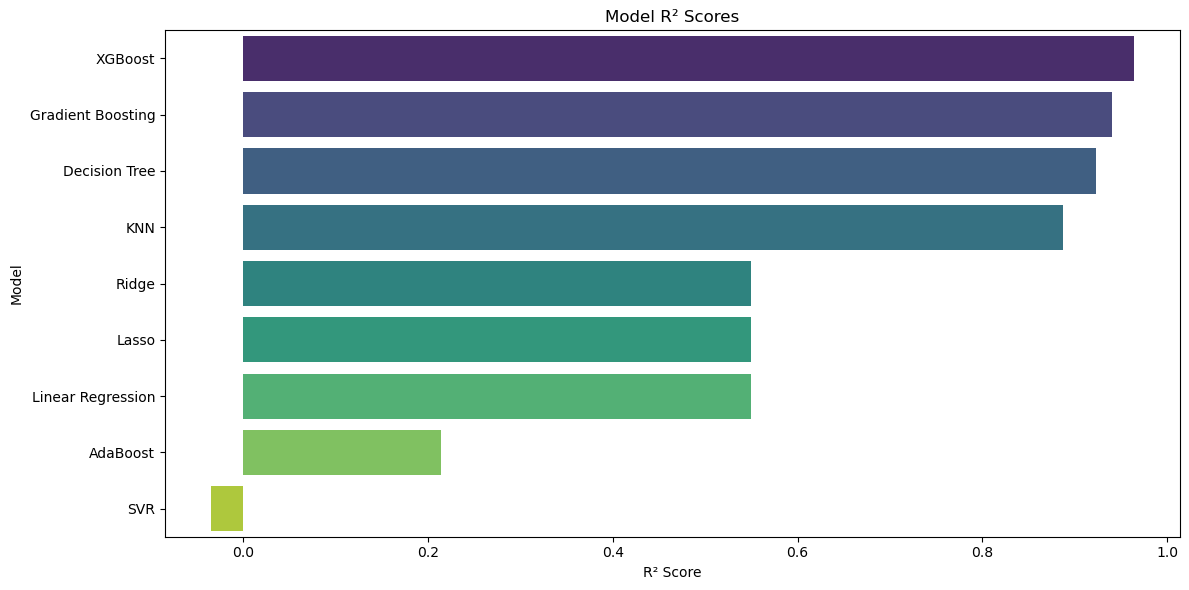


Best model 'XGBoost' saved as 'best_model.pkl'

Predicted Price for Sample Input: PKR 2,687,808


In [2]:
# car_price_prediction.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
import joblib

# Load Data
df = pd.read_csv("Clean Data_pakwheels.csv")

# Drop Unnecessary Column
df.drop(columns=['Unnamed: 0'], inplace=True)

# Encode Categorical Variables
categorical_cols = df.select_dtypes(include='object').columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Feature Scaling
X = df.drop(columns='Price')
y = df['Price']
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define Models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "XGBoost": XGBRegressor(verbosity=0),
    "KNN": KNeighborsRegressor(),
    "SVR": SVR()
}

# Train, Predict, Evaluate
results = []
model_objects = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, preds)
    results.append((name, mae, mse, rmse, r2))
    model_objects[name] = model

# Results DataFrame
results_df = pd.DataFrame(results, columns=["Model", "MAE", "MSE", "RMSE", "R2"])
results_df.sort_values(by="R2", ascending=False, inplace=True)
print("\nModel Evaluation Results:\n")
print(results_df)

# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(x="R2", y="Model", data=results_df, palette="viridis")
plt.title("Model R² Scores")
plt.xlabel("R² Score")
plt.ylabel("Model")
plt.tight_layout()
plt.show()

# Save Best Model
best_model_name = results_df.iloc[0]["Model"]
best_model = model_objects[best_model_name]
joblib.dump(best_model, "best_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(label_encoders, "label_encoders.pkl")
print(f"\nBest model '{best_model_name}' saved as 'best_model.pkl'")

# Prediction Function
def predict_price(input_dict):
    input_df = pd.DataFrame([input_dict])
    for col, le in label_encoders.items():
        if col in input_df:
            input_df[col] = le.transform(input_df[col])
    input_scaled = scaler.transform(input_df)
    prediction = best_model.predict(input_scaled)
    return prediction[0]

# Example Usage
sample_input = {
    'Company Name': 'Toyota',
    'Model Name': 'Corolla',
    'Model Year': 2020,
    'Location': 'Punjab',
    'Mileage': 30000,
    'Engine Type': 'Petrol',
    'Engine Capacity': 1300,
    'Color': 'White',
    'Assembly': 'Local',
    'Body Type': 'Sedan',
    'Transmission Type': 'Automatic',
    'Registration Status': 'Registered'
}

predicted_price = predict_price(sample_input)
print(f"\nPredicted Price for Sample Input: PKR {int(predicted_price):,}")
